In [6]:
from data import *

import pandas as pd
from collections import defaultdict
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.font_manager

try:
    matplotlib.font_manager.fontManager.addfont('/usr/share/fonts/truetype/tlwg/Sawasdee.ttf')
    
    matplotlib.rcParams.update(
        {
            'text.usetex': False,
            'font.family': ['Sawasdee'],
        }
    )
except Exception as e:
    print(e)
    pass

# EXCLUDE_PARTY_NO = []
EXCLUDE_PARTY_NO = [7, 11, 14, 18, 22, 25, 26, 29, 31, 32, 37]

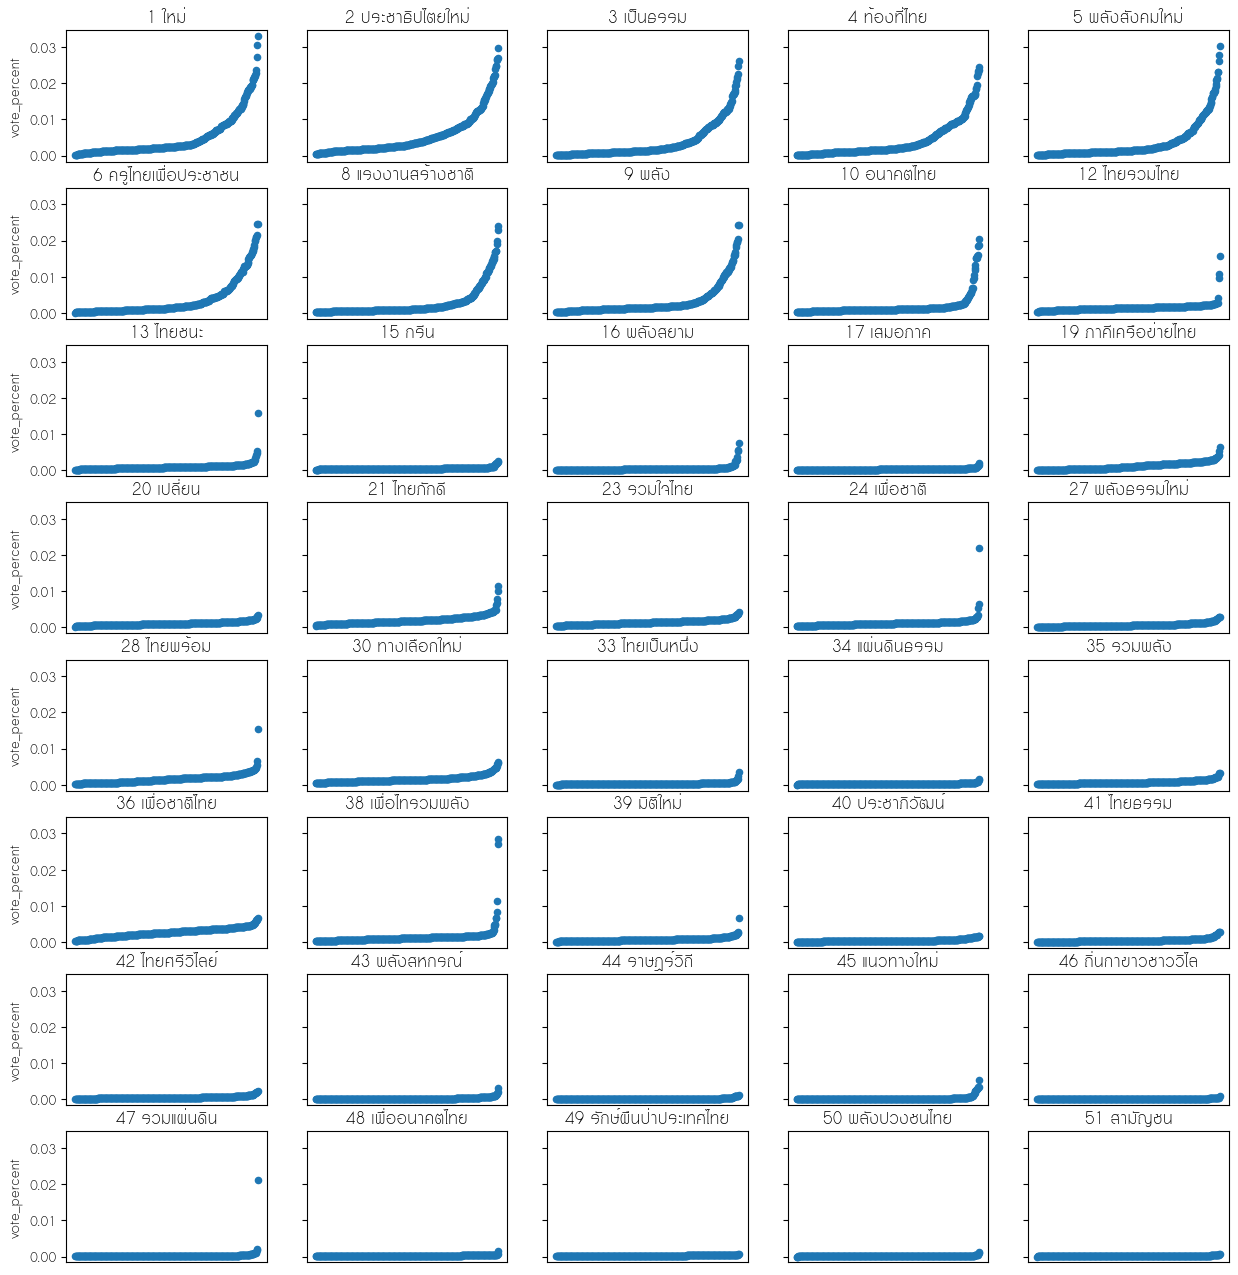

In [7]:
# sorted
filtered_parties = parties[
    (parties['party_no'] != '') & (~parties['party_no'].isin(EXCLUDE_PARTY_NO))
].sort_values('party_no')
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True)
for i, party_id in enumerate(filtered_parties.index[:40]):
    df = party_list_result[party_list_result['party_id'] == party_id].join(
        constituencies, on='cons_id'
    )
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df.reset_index().sort_values(
        'vote_percent'
    ).plot(
        x='cons_id', y='vote_percent', kind='scatter', 
        title=f'{parties["party_no"][party_id]} {parties["name"][party_id]}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

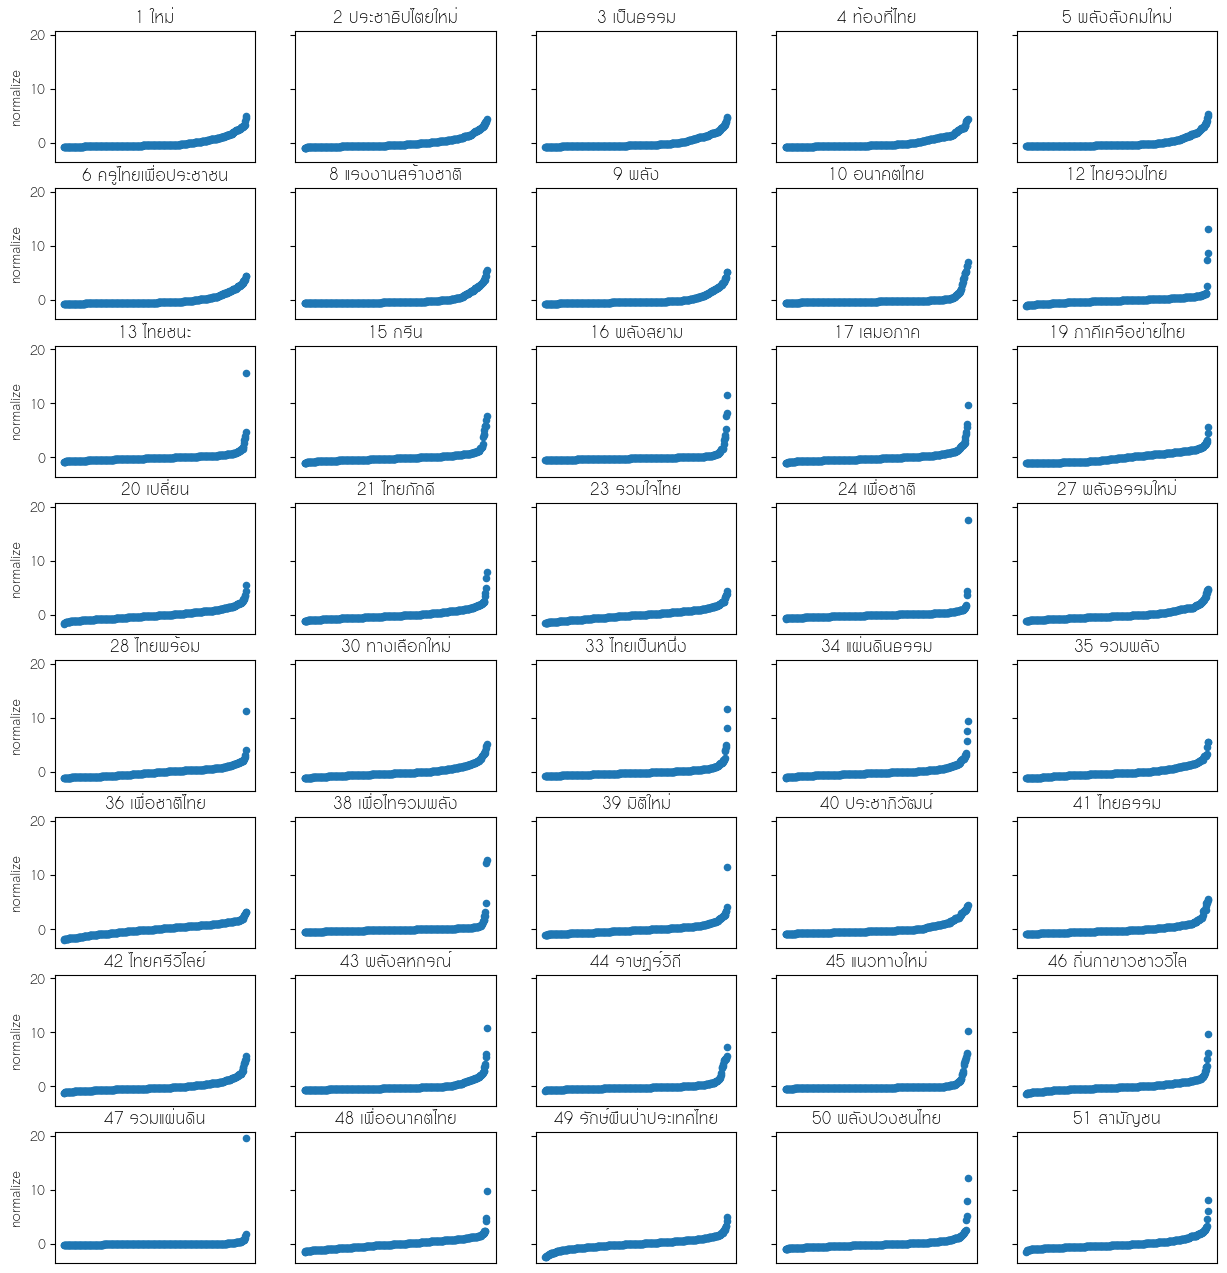

In [8]:
# Normalize sorted

filtered_parties = parties[
    (parties['party_no'] != '') & (~parties['party_no'].isin(EXCLUDE_PARTY_NO))
].sort_values('party_no')
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True)
for i, party_id in enumerate(filtered_parties.index[:40]):
    df = party_list_result[party_list_result['party_id'] == party_id].join(
        constituencies, on='cons_id'
    )
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df.reset_index().sort_values(
        'vote_percent'
    ).plot(
        x='cons_id', y='normalize', kind='scatter', 
        title=f'{parties["party_no"][party_id]} {parties["name"][party_id]}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

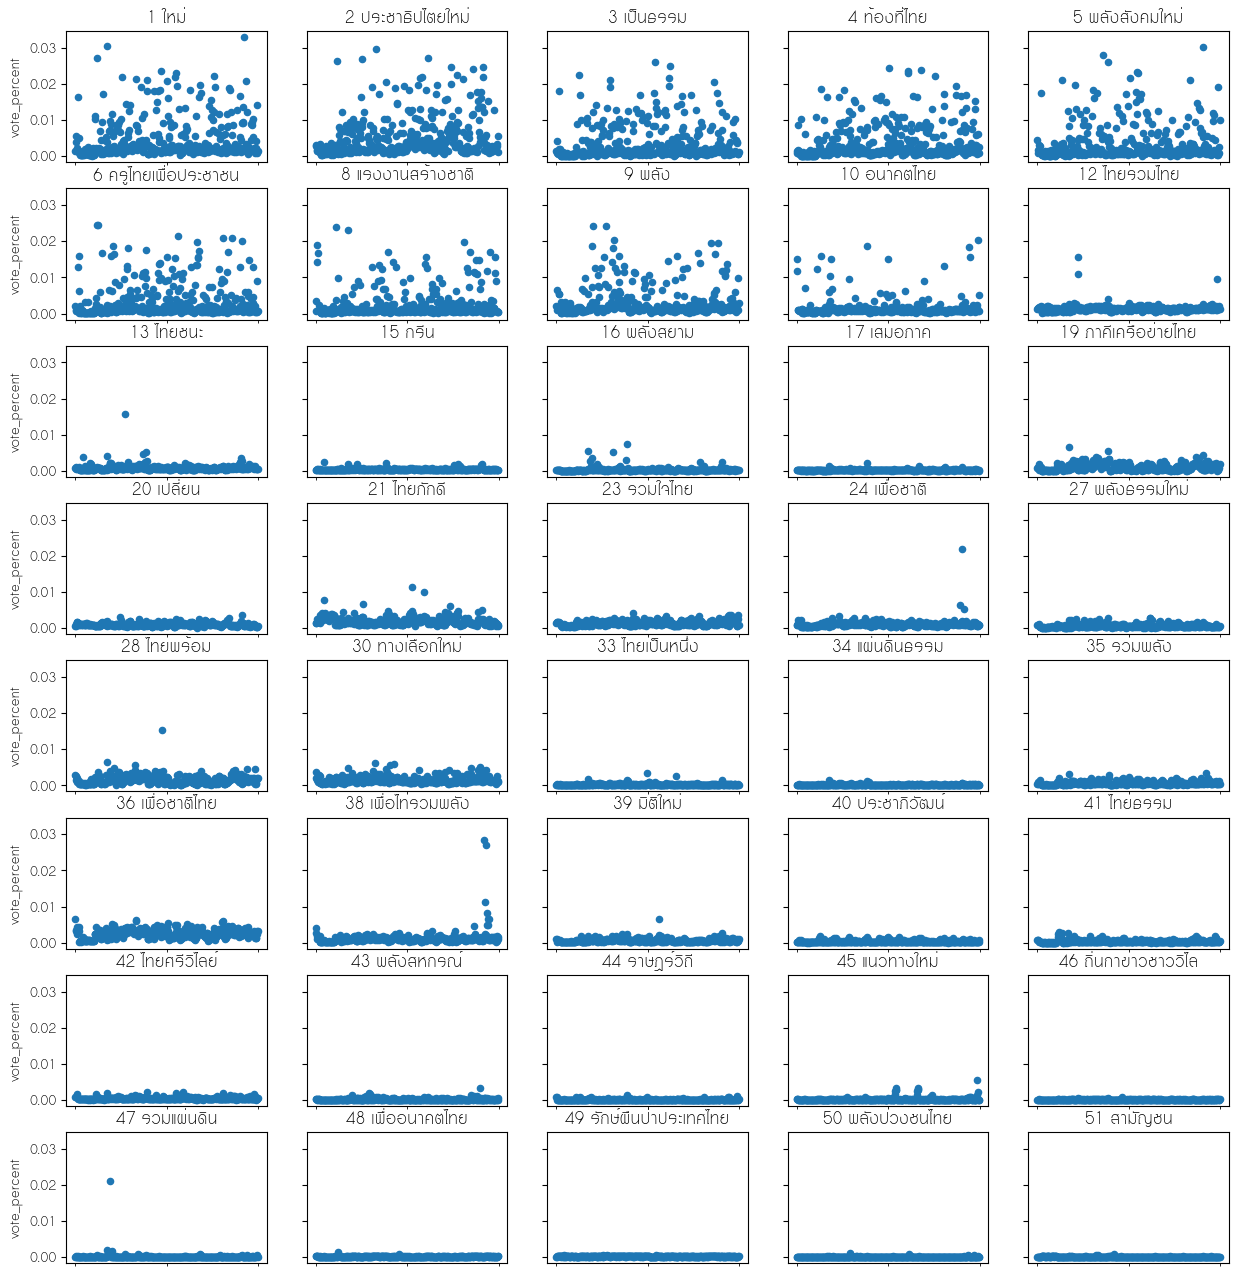

In [9]:
# unsort
filtered_parties = parties[
    (parties['party_no'] != '') & (~parties['party_no'].isin(EXCLUDE_PARTY_NO))
].sort_values('party_no')
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True, sharex=True)
for i, party_id in enumerate(filtered_parties.index[:40]):
    df = party_list_result[party_list_result['party_id'] == party_id].join(
        constituencies, on='cons_id'
    )
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df.reset_index().plot(
        x='cons_id', y='vote_percent', kind='scatter', 
        title=f'{parties["party_no"][party_id]} {parties["name"][party_id]}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

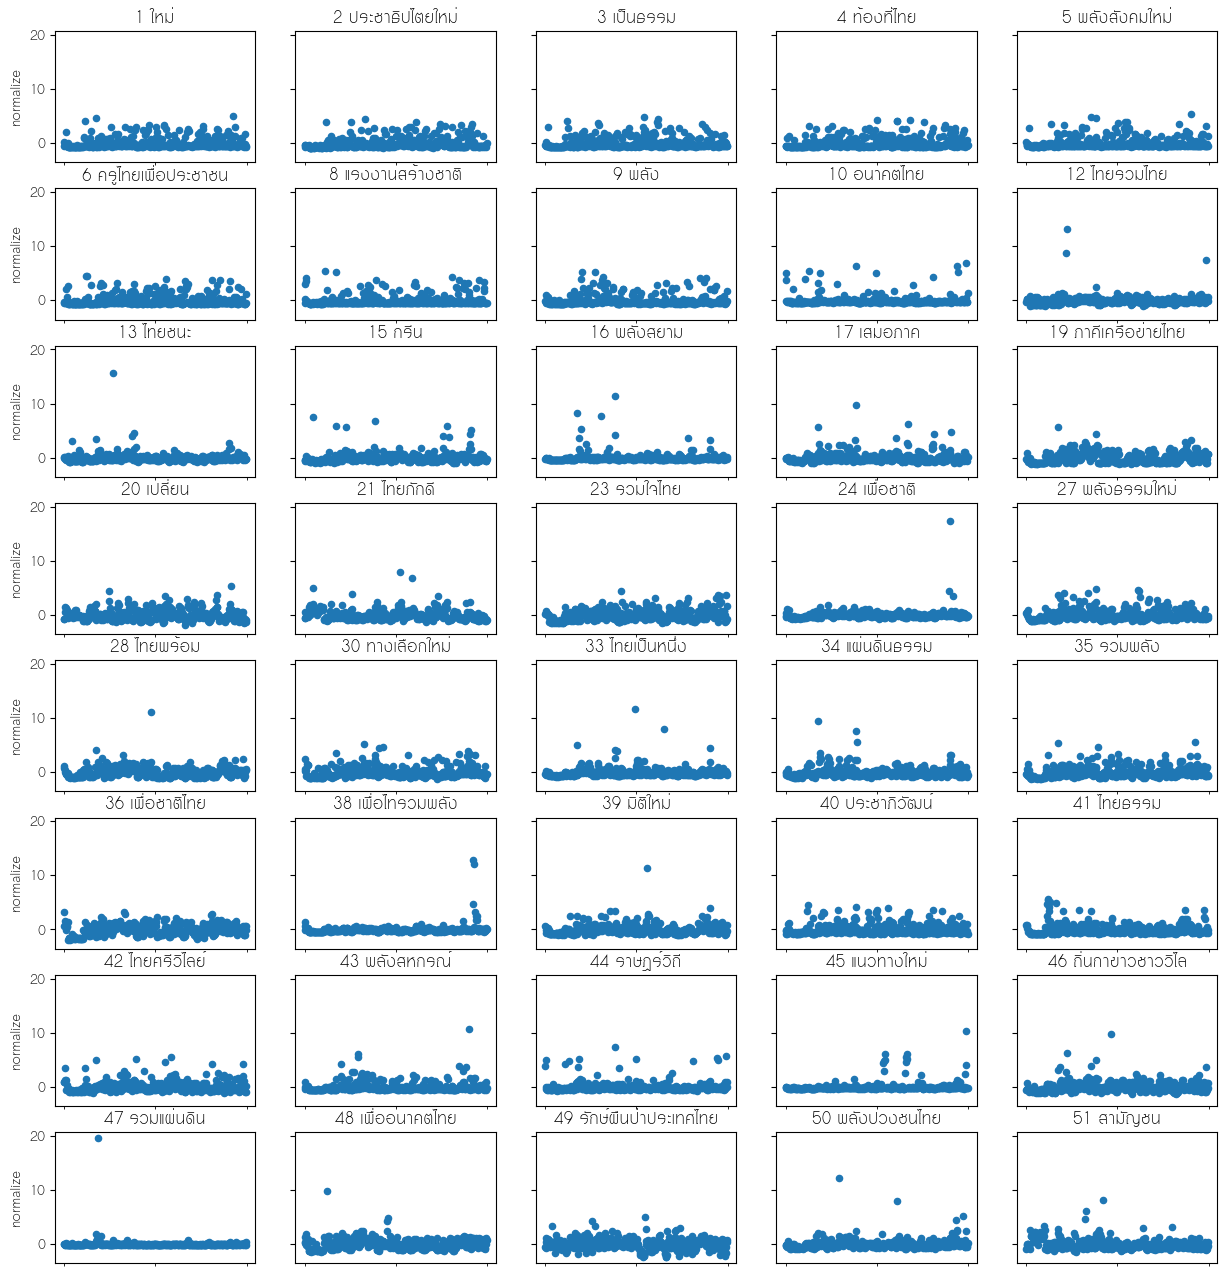

In [10]:
# Normalize unsort
filtered_parties = parties[
    (parties['party_no'] != '') & (~parties['party_no'].isin(EXCLUDE_PARTY_NO))
].sort_values('party_no')
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True, sharex=True)
for i, party_id in enumerate(filtered_parties.index[:40]):
    df = party_list_result[party_list_result['party_id'] == party_id].join(
        constituencies, on='cons_id'
    )
    df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df.reset_index().plot(
        x='cons_id', y='normalize', kind='scatter', 
        title=f'{parties["party_no"][party_id]} {parties["name"][party_id]}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

In [11]:
df = party_list_result.join(
    constituencies, on='cons_id'
)
df['vote_percent'] = df['party_list_vote'] / df['registered_vote']
df = df[['party_id', 'vote_percent']].groupby(
    'party_id'
).apply(
    lambda d: pd.DataFrame({
        'perc_75': d['vote_percent'].describe()['75%'],
        'mean_75': d[d['vote_percent'] <= d['vote_percent'].describe()['75%']]['vote_percent'].mean(),
        'mean': d['vote_percent'].mean(),
        'std': d['vote_percent'].std(),
    }, index=[d['party_id'].iloc[0]])
)
df = df.join(parties, how='left')

<Axes: xlabel='party_no'>

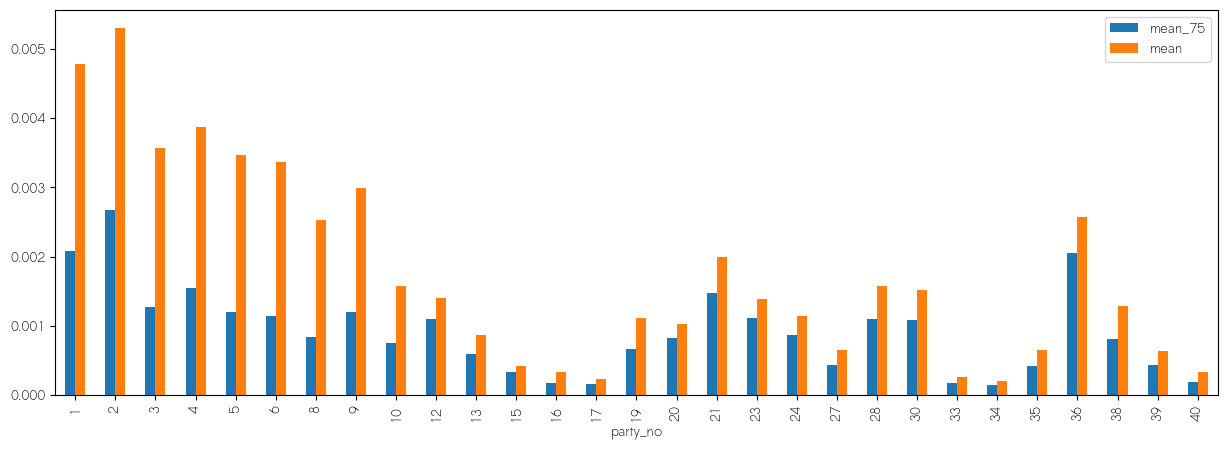

In [12]:
df = df[(df['party_no'] != '') & (~df['party_no'].isin(EXCLUDE_PARTY_NO))]
df[df['party_no'] <= 40][['party_no', 'mean_75', 'mean']].sort_values(
    'party_no'
).plot(x='party_no', kind='bar', figsize=(15, 5))

In [13]:
df[df['mean']/df['mean_75'] >= 1.75][['party_no', 'name']].sort_values('party_no')

party_no                name
party_id                                 
778      778        1                ใหม่
712      712        2     ประชาธิปไตยใหม่
747      747        3            เป็นธรรม
776      776        4          ท้องที่ไทย
761      761        5       พลังสังคมใหม่
714      714        6  ครูไทยเพื่อประชาชน
779      779        8     แรงงานสร้างชาติ
781      781        9                พลัง
708      708       10            อนาคตไทย
767      767       16            พลังสยาม
728      728       40        ประชาภิวัฒน์
732      732       41             ไทยธรรม
715      715       43          พลังสหกรณ์
774      774       44          ราษฎร์วิถี
770      770       45          แนวทางใหม่
739      739       47          รวมแผ่นดิน
723      723       54            ภราดรภาพ

---